<a href="https://colab.research.google.com/github/juathanduarte/cncomp/blob/main/juathan_duarte_relatorio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Interpolação Linear

**Nomes:** Gabriel Timm, Fernanda Kipper, Juathan Duarte, Henrique Garcia, Lucas Ferreira

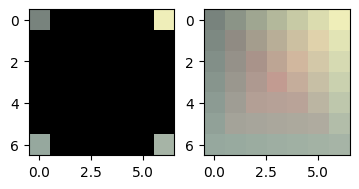

In [ ]:
import matplotlib.pyplot as plt

# the matrix with the reference color elements
ref=np.full([7, 7, 3], 0 , dtype=np.uint8)
#Note I fill with 0 instead of 255
ref[0][6] = (239,238,185)
ref[0][0] = (120,131,125)
ref[6][0] = (150,168,158)
ref[6][6] = (166,180,166)

from scipy.interpolate import griddata

#we format the data to feed in griddata
points=np.where(ref != 0)
values=ref[points]
grid_x,grid_y,grid_z=np.mgrid[0:7,0:7,0:3]

#we compute the inperpolation
filled_grid=griddata(points, values, (grid_x, grid_y, grid_z), method='linear')
filled_grid=np.array(filled_grid,dtype=np.uint8) #we convert the float64 to uint8

plt.subplot(131)
plt.imshow(ref,interpolation='nearest')
plt.subplot(132)
plt.imshow(filled_grid,interpolation='nearest')


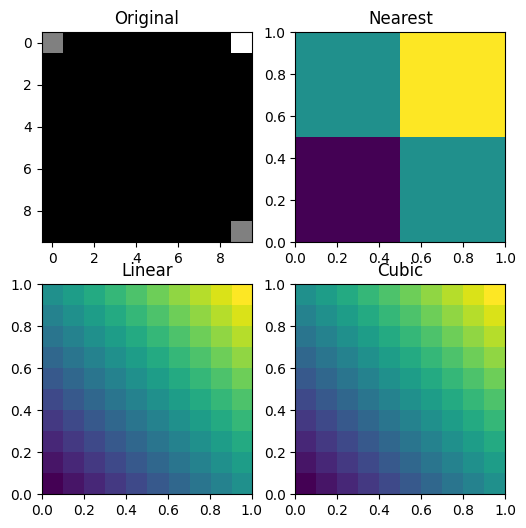

In [ ]:
import numpy as np
def func(x, y):
    return x**2 + y**2

grid_x, grid_y = np.mgrid[0:1:10j, 0:1:10j]

points = np.array([(0,0),(0,1),(1,0),(1,1)])

values = func(points[:,0], points[:,1])

values_original = np.full((10,10), 0)
values_original[0][0] = values[2]
values_original[0][9] = values[3]
values_original[9][0] = values[0]
values_original[9][9] = values[1]

# values_original = values
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(values_original, cmap='gray')
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

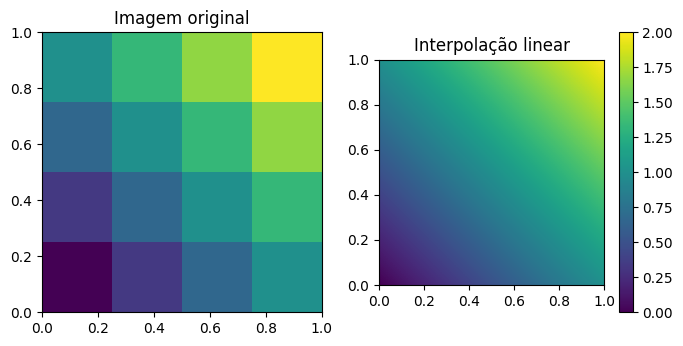

In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Define a função de cores
def func(x, y):
    return x**2 + y**2

# Define a grade de pontos para interpolação
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

# Gera a matriz de pontos da imagem original
points = np.array([(0,0),(0,1),(1,0),(1,1)])
values = func(points[:,0], points[:,1])
img_points_x, img_points_y = np.meshgrid(np.linspace(0, 1, 4), np.linspace(0, 1, 4))
img_points = np.column_stack((img_points_x.ravel(), img_points_y.ravel()))

# Interpola os valores de cor da imagem original
img_colors = griddata(points, values, img_points, method='linear')
img_colors = img_colors.reshape((4, 4))

# Interpola os valores de cor da imagem interpolada
interp_colors = griddata(points, values, (grid_x, grid_y), method='linear')

# Plota as imagens
plt.subplot(221)
plt.imshow(img_colors.T, extent=(0,1,0,1), origin='lower')
plt.title('Imagem original')
plt.subplot(222)
plt.imshow(interp_colors.T, extent=(0,1,0,1), origin='lower')
plt.title('Interpolação linear')
plt.colorbar()
plt.gcf().set_size_inches(8, 8)
plt.show()


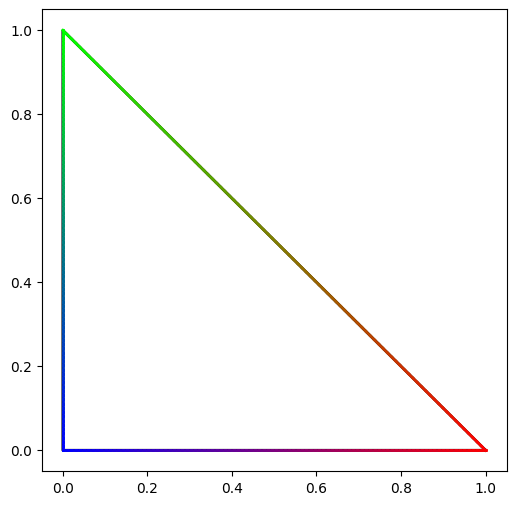

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


# Define os vértices do triângulo com valores RGB
v1 = np.array([1.0, 0.0, 0.0])  # vermelho
v2 = np.array([0.0, 1.0, 0.0])  # verde
v3 = np.array([0.0, 0.0, 1.0])  # azul

# Define os pontos da borda do triângulo
edge1 = np.linspace(v1, v2, num=100, endpoint=True)
edge2 = np.linspace(v2, v3, num=100, endpoint=True)
edge3 = np.linspace(v3, v1, num=100, endpoint=True)

# Concatena as bordas em uma única lista
edges = np.concatenate((edge1, edge2[1:], edge3[1:]))

# Cria uma figura com um gráfico de linha que plota as bordas do triângulo
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(edges[:,0], edges[:,1], color='black', linewidth=2)

# Converte os valores RGB em hexadecimais para uso com a biblioteca matplotlib
hex_colors = [colors.rgb2hex(e) for e in edges]

# Pinta as bordas do triângulo com as cores gradientes
for i in range(len(hex_colors)-1):
    ax.plot(edges[i:i+2,0], edges[i:i+2,1], color=hex_colors[i], linewidth=2)

plt.show()